WINE DATA ANALYSIS

In [0]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import KNN
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [0]:
data = pd.read_csv('/content/drive/My Drive/Knight ML Assignment/Data/train.csv')

#replacing the NaN values in price column with mean
data['price']=data['price'].fillna(36.9)
#Droping the region_2 column as it contains more than 50% of NaN values 
data=data.drop('region_2',axis=1)

In [0]:
#filling the NaN values
for i in range(0,8):
  data = data.fillna(data.iloc[:,i].value_counts().index[0])

In [31]:
#initialize packages to use
encoder = OrdinalEncoder()
imputer = KNN()
# create a list of categorical columns to iterate over
cat_cols = ['user_name','country','review_description','review_title','designation','province','region_1','winery','variety']

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(data[columns])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

In [0]:
#Selecting features based on correlation
corr = data.corr()

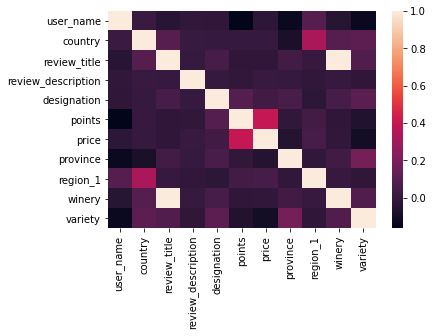

In [34]:
#HeatMap creation with Seaborn
sns.heatmap(corr)

In [0]:
#we compare the correlation between features and remove one of two features that have a correlation higher than 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [0]:
data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,variety
0,10.0,2.0,2321.0,16883.0,17595.0,83,10.0,17.0,849.0,5.0
1,11.0,36.0,52311.0,70585.0,280.0,89,15.0,345.0,239.0,17.0
2,10.0,19.0,59100.0,13495.0,5446.0,94,80.0,234.0,65.0,11.0
3,10.0,12.0,25802.0,30311.0,12334.0,87,22.0,281.0,86.0,1.0
4,10.0,12.0,18413.0,67354.0,13345.0,88,33.0,104.0,953.0,9.0


In [0]:
#Selecting columns based on p-value
selected_columns = selected_columns[:-1]
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

In [0]:
result = pd.DataFrame()
result['variety'] = data.iloc[:,-1]

In [0]:
#Creating a Dataframe with the columns selected using the p-value and correlation
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)

In [0]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [0]:
#Now we split the data to train and test set. 20% of the data is used to create the test data and 80% to create the train data
X_train, X_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2,random_state=1)

In [52]:
#applying RandomForest
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=50, random_state=1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(accuracy_score(y_test, y_pred))

0.9918340188724897
